# ERRORES DE SESGO (BIAS) Y VARIANZA (VARIANCE)

## 0. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

%matplotlib inline

## 1. Load Data

- This example aims to present the bias-variance trade-off through a practical example in Python.

- The bias-variance trade-off refers to the balance between two competing properties of machine learning models.

- The goal of supervised machine learning problems is to find the mathematical representation (f) that explains the relationship between input predictors (x) and an observed outcome (y):

![outcome_1](img/outcome_1.png)

- Where Ɛ indicates noise in the data.

- As an example, we create our synthetic x and y by choosing a sine wave as relationship between the two:

![outcome_1](img/outcome_2.png)

- where { x ∈ R ∣ 0 < x < 2 }

- We also assume a normally distributed noise, with mean=0 and variance=1.

- In a real-world scenario, we would not know the relationship between predictors and outcome.

- Given a dataset, our task is to find suitable candidate models and choose the one that better fits our information.

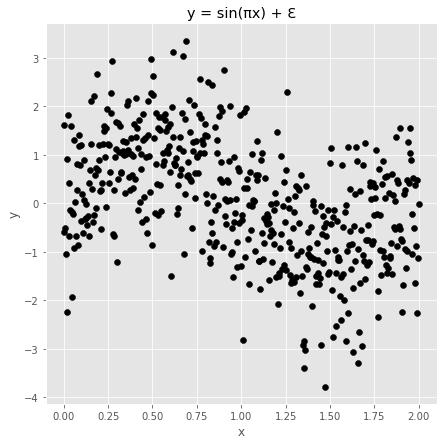

In [2]:
# number of observations
NUM_OBS = 500
np.random.seed(1)

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

plt.show()

In [10]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
x_rest, x_test, y_rest, y_test = train_test_split(x,             #100% de los datos de entrada. 
                                                    y,           #100% de los datos de salida. 
                                                    test_size=particion_para_pruebas, 
                                                    random_state=valor_semilla_aleatoria, 
                                                    shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
x_train, x_val, y_train, y_val = train_test_split(x_rest,                                    #Una fracción de los datos de entrada. 
                                                    y_rest,                                    #Una fracción de los datos de salida.        
                                                    test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                    random_state=valor_semilla_aleatoria, 
                                                    shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

In [11]:
print('Training set shape: ', x_train.shape)
print('Test set shape: ', x_test.shape)
print('Validation set shape', x_val.shape)

Training set shape:  (300,)
Test set shape:  (100,)
Validation set shape (100,)


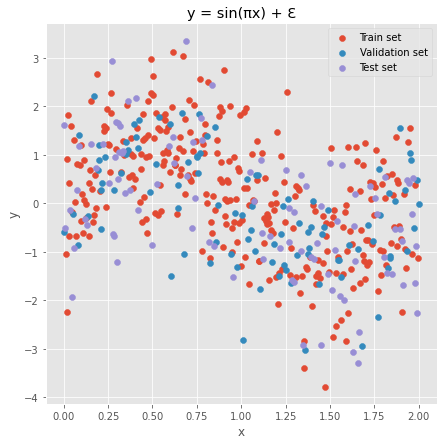

In [12]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_val, y_val, label = "Validation set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

plt.show()

Now we will to train some models on the train set and assess their performances on the validation set. At the end we will use the test set.

In particular, we want to minimize the error that the model makes when predicting the outcome from the predictors; such error is typically a measure of distance between the predicted outcome (y_predicted) and the observed outcome (y_observed), for all our observations (n).

In this case, we can use the Mean Square Error (MSE), defined as follows:

![MSE_1](img/mse_1.png)

Moreover, we could prove that this error can be decomposed into the sum of three quantities:

![MSE_2](img/mse_2.png)

Any model, however good, is an approximation of complex relationships between data, therefore the so called irreducible error is a component that cannot be avoided.

From the formula, it seems that a good model should minimize both bias and variance: let us define those terms.

#### Bias

Bias takes into account the difference between the model prediction and the real outcome.

It depends mainly on the model we choose to solve our problem, and how the model assumptions can suitably interpret the relationship between predictors and outcome.

We can empirically assess that a model suffers from high bias because it shows a high error on the train set. Or, in other words, a low training performance: this condition goes under the name of underfitting.

    High bias:

    - Model assumptions fail to explain the relationship between predictors and outcome.

    - Involves “simpler” (less flexible) models, such as linear regression.

    - Leads to underfitting (poor train set performances).

#### Variance

Variance measures how different choices of the train sets would affect the the model parameters.

When we train a machine learning model, we want that, by selecting a slightly different train set, the function would not change significantly. Otherwise, we would have obtained a model unable to generalize in front of small variations in the input data: this goes under the name of overfitting.

As the model is complex enough to overfit on a train set, we would expect high train performances (or low training error), but also poor test performances, as the model would require significant changes in the parameters to explain small variations in the data.

    High variance:

    - Involves more “complex” models (more flexible.

    - Leads to overfitting (poor test set performances).

The concept is summarized by this image:

![error_1](img/error_1.png)

In order to illustrate these concepts in our example, we fit multiple polynomial models with increasing polynomial degree on the train set, and then observe the trend of the MSE over the increasing model complexity:

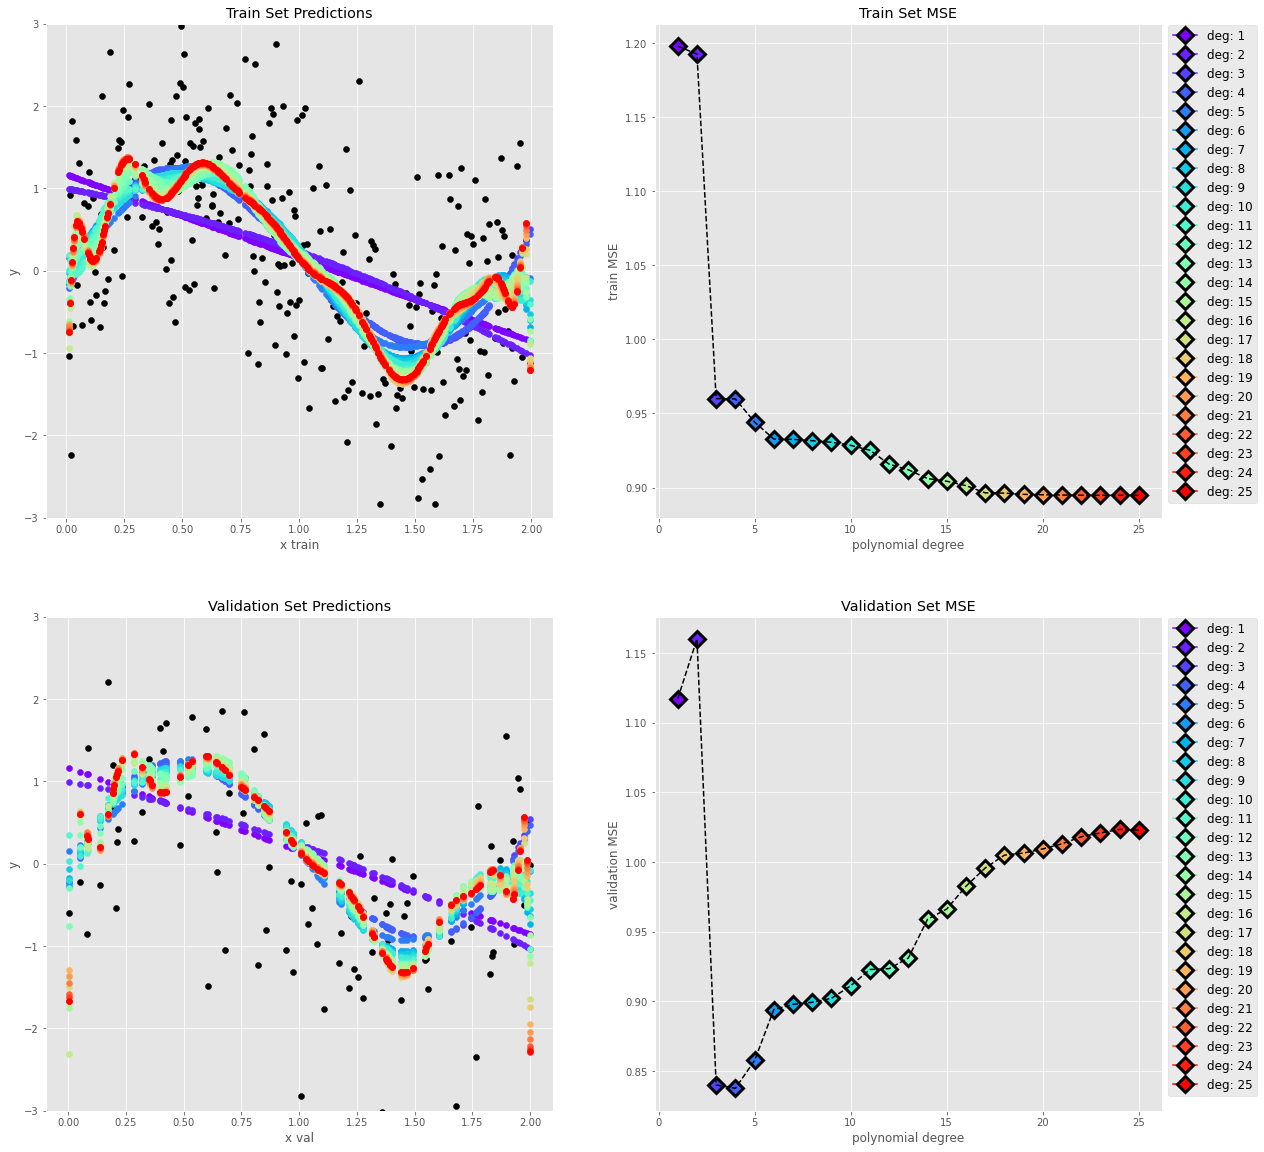

In [13]:
from sklearn.linear_model import LinearRegression

#x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#x_val = x_val.reshape(-1,1)
#y_val = y_val.reshape(-1,1)
#x_test = x_test.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

# number of polynomial models to investigate
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Validation Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Validation Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x val")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("validation MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_val, y_val, c = 'k', label = "y val")

train_mse = []
val_mse = []

for k in range(0, NUM_MODELS):
    
    lin_reg = LinearRegression()
    
    x_t = []
    x_v = []
    
    deg = k+1
    
    for i in range(deg):
        #x_t.append(x_train[:,0]**(i+1))
        #x_v.append(x_val[:,0]**(i+1))
        x_t.append(x_train**(i+1))
        x_v.append(x_val**(i+1))
        
    x_t = np.array(x_t)
    x_t = np.transpose(x_t)

    x_v = np.array(x_v)
    x_v = np.transpose(x_v)
    
    lin_reg.fit(x_t,y_train)
    
    y_train_pred = lin_reg.predict(x_t)
    y_val_pred = lin_reg.predict(x_v)

    c = next(colors)

    # k-th degree polynomial coefficients
    #fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

    # train and test k-th degree polynomial fit
    #y_train_pred = np.polyval(fit_coeff, x_train)
    #y_val_pred = np.polyval(fit_coeff, x_val)

    # plot train and test k-th degree polynomial fit
    axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

    axs[1,0].scatter(x_val,
                   y_val_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

    # train and test MSE of k-th degree polynomial fit 
    iter_train_mse = mean_squared_error(y_train_pred, y_train)
    iter_val_mse = mean_squared_error(y_val_pred, y_val)

    train_mse.append(iter_train_mse)
    val_mse.append(iter_val_mse)

    # plot train and test MSE of k-th degree polynomial fit
    axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

    axs[1,1].plot(k+1,
                iter_val_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), val_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

plt.show()

In [14]:
print("Best fit polynomial degree: ", val_mse.index(min(val_mse))+1)

Best fit polynomial degree:  4
